# Red Neuronal de Una Capa

Paso 1. Corre la siguiente casilla para importar la paquetería necesaria

In [637]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

Paso 2. Corre el siguiente bloque con las funciones de activación programadas en la práctica anterior

In [638]:
# La funcion de activación lineal se usa en problemas de regresión
def linear (z, derivative=False):
    a = z
    if derivative:
        da = np.ones(z.shape, dtype=float)
        return a, da
    return a

# La funcion de activacion logistica se usa en problemas 
# de clasificacion multi-etiquetas
def logistic(z, derivative=False):
    a = 1 / (1 + np.exp(-z))
    if derivative:
        da = np.ones(z.shape, dtype=float)
        return a, da
    return a

Paso 3. Programa la función de activacion softmax

In [639]:
# La función de activacion softmax se usa en problemas de
# clasificación multiclase con un solo ganador
def softmax(z, derivative=False):
    c = np.max(z, axis=0)  # Termino para estabilizar
    e = np.exp(z - c)
    a = e / np.sum(e, axis=0)
    if derivative:
        da = np.ones(z.shape, dtype=float)
        return a, da
    return a

Paso 4. Programa una clase que representa la red neuronal de una capa

In [640]:
class OLN:
    """One-Layer Network"""
    def __init__(self, n_input, n_output,
                activation_function=linear):
        self.w = -1 + 2 * np.random.rand(n_output, n_input)
        self.b = -1 + 2 * np.random.rand(n_output, 1)
        self.f = activation_function
        
    def predict(self, X):
        return self.f(self.w @ X + self.b)
    
    def fit(self, X, Y, epochs=1000, lr=0.1):
        _, p = X.shape
        for _ in range(epochs):
            Y_est, dY = self.f(self.w @ X + self.b, derivative=True)
            lg = (Y - Y_est) * dY
            self.w += lr / p * lg @ X.T
            self.b += lr / p * np.sum(lg, axis=1).reshape(-1, 1)

# Primer Experimento: Clasificación multi-etiqueta

Paso 5. Carga el archivo 'DataSet_A03.csv', contiene entradas de dos dimensiones y salidas deseadas de 4 dimensiones.

In [641]:
df = pd.read_csv('./Datasets/DataSet_A03.csv')
df.head()

,x1,x2,y1,y2,y3,y4
0,0.96091,0.426130,0,1,0,0
1,0.95670,0.362520,0,1,0,0
2,0.50640,0.056677,0,0,1,0
3,0.97755,0.360880,0,1,0,0
4,0.49868,0.128370,0,0,1,0


Paso 6. Crea la matriz X de entrada y la matriz Y de salidas deseadas

In [642]:
X = df.iloc[:, :2].to_numpy().T
Y = df.iloc[:, 2:].to_numpy().T

Paso 7. Corre la siguiente función que te ayudará a dibujar el experimento

In [643]:
def plot_data(X, Y, net):
    dot_c = ('r', 'g', 'b', 'k')
    lin_c = ('r-', 'g-', 'b-', '-k')
    for i in range(X.shape[1]):
        c = np.argmax(Y[:, i])
        plt.scatter(X[0, i], X[1, i], color=dot_c[c], edgecolors='k')
        
    for i in range(4):
        w1, w2, b = net.w[i, 0], net.w[i, 1], net.b[i]
        plt.plot([-0.25, 1.25], [(-1/w2) * (w1 * (- 0.25) + b), (-1/w2) * (w1 * (1.25) + b)], lin_c[i])
    
    plt.xlim([-0.25, 1.25])
    plt.ylim([-0.25, 1.25])

Paso 8. Crea y entrena tu red neuronal con los datos que trabajaste y dibuja el resultado con la función anterior.

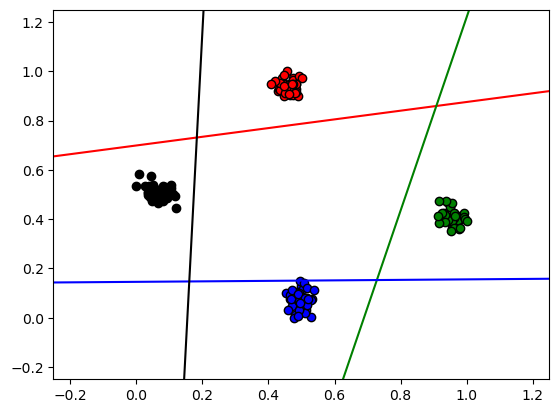

In [644]:
net = OLN(2, 4, activation_function=logistic)
net.fit(X, Y)
plot_data(X, Y, net)

# Segundo Experimento: Clasificación con un solo ganador

Paso 9. Corre el siguiente ejemplo para generar un conjunto de datos de clasificación con un solo ganador

In [645]:
# Generación de un conjunto de datos para clasificación

# Limites 
minx = -5
maxx = 5

# Numero de clases y puntos por clase
clases = 8
p_c = 20
X = np.zeros((2, clases * p_c))
Y = np.zeros((clases, clases * p_c))

for i in range(clases):
    seed = minx + (maxx - minx) * np.random.rand(2,1)  # Aleatorios entre -5 y 5
    X[:, i * p_c: (i+1) * p_c] = seed + 1 * np.random.rand(2, p_c)
    Y[i, i * p_c: (i+1) * p_c] = np.ones((1, p_c))

Paso 10. Entrena una red neuronal para aprender el conjunto de datos anterior, guarda en la variable Ypred la predicción de todos los datos.

In [646]:
# Instancia una red neuronal con el numero de entradas, salidas
# y función de activación correctas
net = OLN(2, clases, activation_function=softmax)

# Entrena la red neuronal
net.fit(X, Y, epochs=1000, lr=1)

# Guarda las predicciones de la red de todos los datos en X
Ypred = net.predict(X)

# Crear rejilla de puntos (para pintar las fronteras de decision)
xx = np.linspace(minx-0.5, maxx+0.5, 500)
yy = np.linspace(minx-0.5, maxx+0.5, 500)

Xx, Yy = np.meshgrid(xx, yy)
grid = np.vstack((Xx.ravel(), Yy.ravel()))
# Predecir para todos los puntos de la rejilla
Ypred_grid = net.predict(grid)

Paso 11. Corre el siguiente código para graficar tus resultados

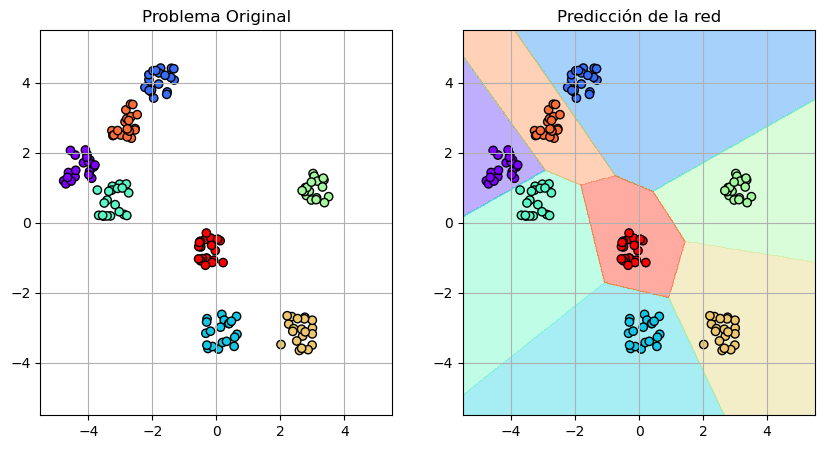

In [647]:
# Colores para dibujar las clases
#cm = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

# Grafico con los datos originales
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1,2,1)
y_c = np.argmax(Y, axis=0)
ax1.scatter(X[0, :], X[1, :], c=y_c, edgecolors='k', cmap='rainbow')
ax1.axis([-5.5, 5.5, -5.5, 5.5])
ax1.set_title("Problema Original")
ax1.grid()

# Grafico de las predicciones de la red
ax2 = plt.subplot(1, 2, 2)
y_c = np.argmax(Ypred, axis=0)
y_c_grid = np.argmax(Ypred_grid, axis=0)
niveles_contorno = np.arange(-0.5, 8, 1)
ax2.contourf(Xx, Yy, y_c_grid.reshape(Xx.shape), levels=niveles_contorno, cmap="rainbow", alpha=0.4)
ax2.scatter(X[0, :], X[1, :], c=y_c, edgecolors='k', cmap='rainbow')
ax2.axis([-5.5, 5.5, -5.5, 5.5])
ax2.set_title("Predicción de la red")
ax2.grid()
plt.show()